In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('../../data/df_rfm_model.csv', index_col=0)

df.head()

,Recency,Frequency,MonetaryValue,Country
Customer_ID,,,,
12347,2,216,4620.32,Iceland
12348,75,46,1658.40,Finland
12349,19,161,3319.06,Italy
12350,310,13,258.00,Norway
12352,36,93,1705.64,Norway


### Cellule 1 : Ajustement du modèle KMeans

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Supprimer la colonne 'Country'
df = df.drop('Country', axis=1)

###
# Sélectionner uniquement les colonnes numériques
df_numerique = df[['Recency', 'Frequency', 'MonetaryValue']]

# Normaliser les données
normalisateur = StandardScaler()
df_normalise = normalisateur.fit_transform(df_numerique)

# Ajuster le modèle KMeans avec les données normalisées
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Vous pouvez changer le nombre de clusters
kmeans.fit(df_normalise)

# Ajouter les étiquettes de cluster pour chaque point de données au dataframe
df['Cluster'] = kmeans.labels_

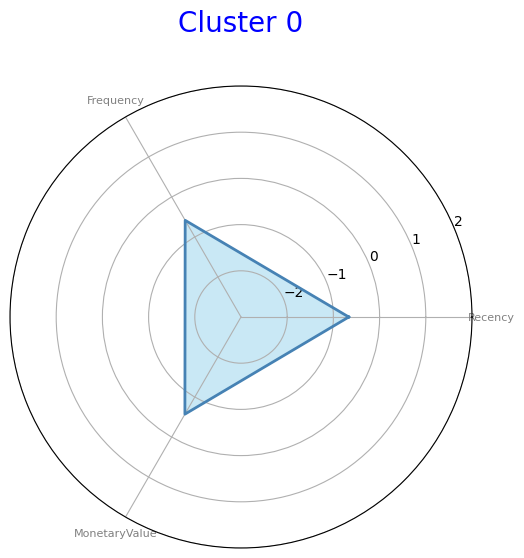

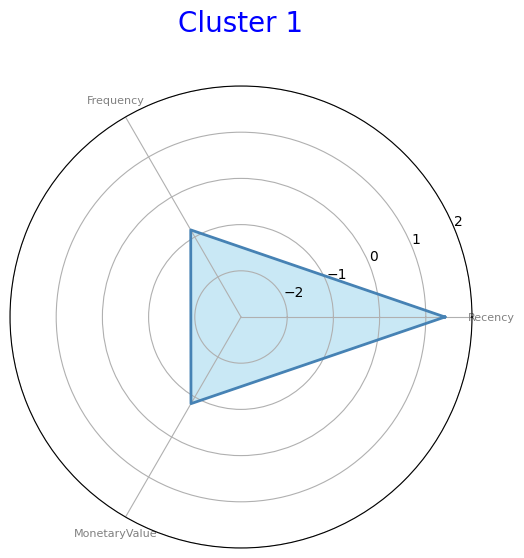

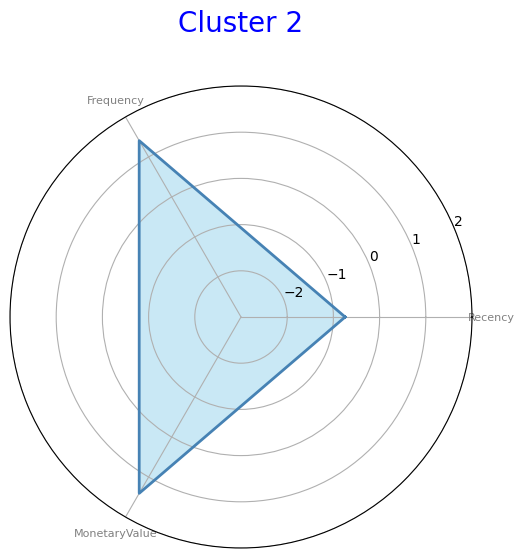

In [43]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Calculate average RFM values for each cluster
cluster_avg = df.groupby('Cluster').mean().reset_index()

# Normalize the cluster averages
scaler = StandardScaler()
cluster_avg_normalized = scaler.fit_transform(cluster_avg.drop('Cluster', axis=1))

# Convert back to DataFrame and add the Cluster column back
cluster_avg_normalized = pd.DataFrame(cluster_avg_normalized, columns=cluster_avg.columns[1:])
cluster_avg_normalized['Cluster'] = cluster_avg['Cluster']

# Number of variables we're plotting
num_vars = len(cluster_avg.columns) - 1

# Split the circle into even parts and save the angles
# so we know where to put each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end
angles += angles[:1]

# Loop through each cluster
for i, row in cluster_avg_normalized.iterrows():
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], cluster_avg.columns[1:], color='grey', size=8)
    # Values
    values = row.drop('Cluster').values.flatten().tolist()
    values += values[:1]
    
    # Draw filled area
    ax.fill(angles, values, color='skyblue', alpha=0.25)
    ax.fill(angles, values, color='skyblue', alpha=0.25)
    ax.plot(angles, values, color='steelblue', linewidth=2)
    
    # Set title
    plt.title('Cluster ' + str(int(row['Cluster'])), size=20, color='blue', y=1.1)
    ax.set_ylim([-3, 2])
    # Show the graph
    plt.show()


Cela fournit un contexte utile pour mieux comprendre les données et comment elles pourraient être interprétées. Les résultats du clustering basé sur les caractéristiques RFM (Recency, Frequency, MonetaryValue) peuvent maintenant être associés à des profils de comportement d'achat des clients:

Cluster 0: Ce groupe pourrait représenter les clients "en sommeil" ou "à risque". Ils ont eu des interactions plus anciennes et moins fréquentes, et leur valeur monétaire globale est plus faible. Le marketing pourrait envisager des stratégies pour les réengager, comme des offres spéciales ou des rappels de produits qu'ils ont achetés précédemment.

Cluster 1: Ces clients ont interagi plus récemment mais ont une fréquence et une valeur monétaire plus faibles. Ils pourraient être des clients "occasionnels" ou "nouveaux". Des stratégies de marketing pour ce groupe pourraient inclure des incitations pour augmenter la fréquence d'achat, comme des programmes de fidélité ou des recommandations de produits basées sur leurs achats précédents.

Cluster 2: Ce groupe semble représenter les clients "fidèles" ou "VIP". Ils ont une fréquence d'interaction élevée et une grande valeur monétaire, et ont interagi assez récemment. Des stratégies de marketing pour ce groupe pourraient inclure des offres de produits premium, des avantages supplémentaires pour encourager la fidélité, et des efforts pour maintenir leur satisfaction élevée.

In [44]:
cluster_avg_normalized

,Recency,Frequency,MonetaryValue,Cluster
0,-0.667283,-0.583738,-0.571423,0
1,1.413479,-0.823675,-0.834604,1
2,-0.746197,1.407413,1.406027,2


In [45]:
# Describe each cluster
for i in df['Cluster'].unique():
    print(f'Cluster {i}')
    print(df[df['Cluster'] == i].describe())
    print('\n------------------------\n')

Cluster 2
          Recency   Frequency  MonetaryValue  Cluster
count  881.000000  881.000000     881.000000    881.0
mean    61.316686  231.976163    3804.657719      2.0
std     85.671576   90.627738    1670.253761      0.0
min      1.000000    7.000000     934.010000      2.0
25%     11.000000  162.000000    2628.990000      2.0
50%     30.000000  223.000000    3526.370000      2.0
75%     68.000000  295.000000    4778.730000      2.0
max    610.000000  447.000000    8438.340000      2.0

------------------------

Cluster 0
           Recency    Frequency  MonetaryValue  Cluster
count  2522.000000  2522.000000    2522.000000   2522.0
mean     74.323553    56.655432     926.281114      0.0
std      66.429313    44.759792     709.767503      0.0
min       1.000000     1.000000       0.000000      0.0
25%      22.000000    21.000000     369.035000      0.0
50%      53.000000    46.000000     749.905000      0.0
75%     111.750000    81.000000    1313.920000      0.0
max     288.000000 

### Cellule 2 : Application de l'ACP et visualisation des clusters

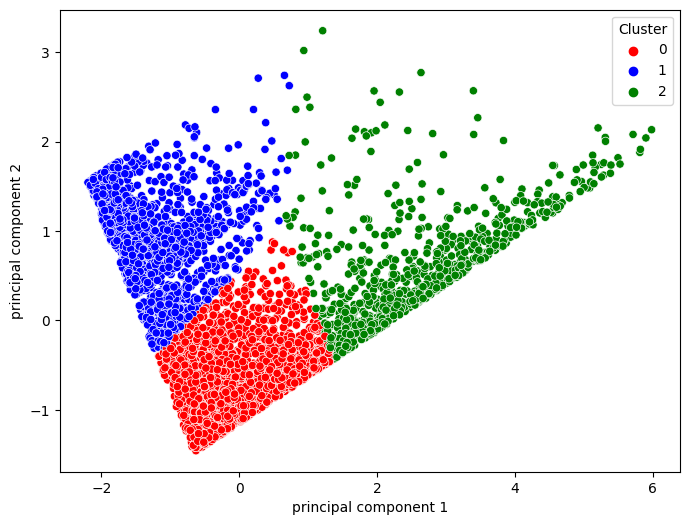

In [46]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer l'ACP
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_normalise)

# Créer un DataFrame avec les composantes principales
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Ajouter les labels de cluster au DataFrame
principalDf['Cluster'] = kmeans.labels_

# Visualiser les clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x="principal component 1", y="principal component 2", hue="Cluster", data=principalDf, palette=['red','blue','green'])
plt.show()


In [47]:
df

,Recency,Frequency,MonetaryValue,Cluster
Customer_ID,,,,
12347,2,216,4620.32,2
12348,75,46,1658.40,0
12349,19,161,3319.06,2
12350,310,13,258.00,1
12352,36,93,1705.64,0
...,...,...,...,...
18281,181,16,178.64,0
18282,8,12,178.05,0
18284,432,25,391.28,1


In [48]:
# Group by cluster and calculate average RFM values
cluster_avg = df.groupby('Cluster').mean()

# Print the average values
print(cluster_avg)

            Recency   Frequency  MonetaryValue
Cluster                                       
0         74.323553   56.655432     926.281114
1        417.280733   35.528960     543.194190
2         61.316686  231.976163    3804.657719


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

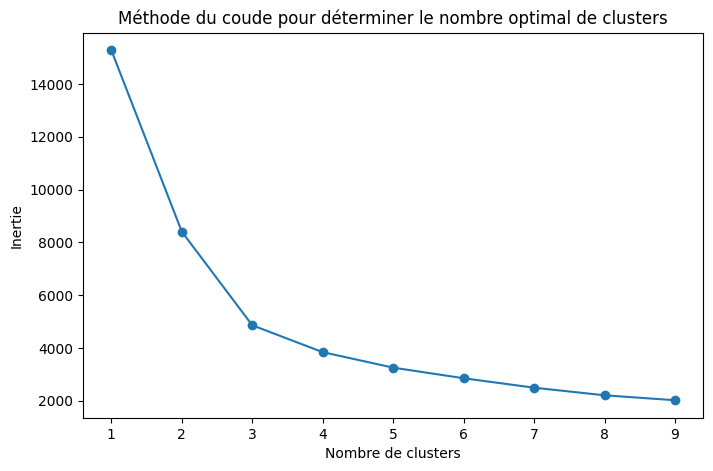

[15285.000000000005,
 8408.676604766255,
 4858.321675430155,
 3839.2719348789064,
 3251.6173895458223,
 2849.9810088499667,
 2491.5292374364954,
 2203.6199201961576,
 2016.5270256525016]

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Liste pour stocker les valeurs d'inertie pour chaque nombre de clusters
inertias = []

# Boucle sur plusieurs nombres de clusters
for k in range(1, 10):
    # Créer un modèle KMeans avec k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Ajuster le modèle aux données
    kmeans.fit(df_normalise)
    
    # Ajouter l'inertie du modèle à la liste
    inertias.append(kmeans.inertia_)

# Tracer l'inertie en fonction du nombre de clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertias, 'o-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()
inertias

In [50]:
# Describe each cluster
for i in df['Cluster'].unique():
    print(f'Cluster {i}')
    print(df[df['Cluster'] == i].describe())
    print('\n------------------------\n')

Cluster 2
          Recency   Frequency  MonetaryValue  Cluster
count  881.000000  881.000000     881.000000    881.0
mean    61.316686  231.976163    3804.657719      2.0
std     85.671576   90.627738    1670.253761      0.0
min      1.000000    7.000000     934.010000      2.0
25%     11.000000  162.000000    2628.990000      2.0
50%     30.000000  223.000000    3526.370000      2.0
75%     68.000000  295.000000    4778.730000      2.0
max    610.000000  447.000000    8438.340000      2.0

------------------------

Cluster 0
           Recency    Frequency  MonetaryValue  Cluster
count  2522.000000  2522.000000    2522.000000   2522.0
mean     74.323553    56.655432     926.281114      0.0
std      66.429313    44.759792     709.767503      0.0
min       1.000000     1.000000       0.000000      0.0
25%      22.000000    21.000000     369.035000      0.0
50%      53.000000    46.000000     749.905000      0.0
75%     111.750000    81.000000    1313.920000      0.0
max     288.000000 

In [51]:
df

,Recency,Frequency,MonetaryValue,Cluster
Customer_ID,,,,
12347,2,216,4620.32,2
12348,75,46,1658.40,0
12349,19,161,3319.06,2
12350,310,13,258.00,1
12352,36,93,1705.64,0
...,...,...,...,...
18281,181,16,178.64,0
18282,8,12,178.05,0
18284,432,25,391.28,1
